 # EDA
 

In [1]:
"""
ADHD Prediction Dataset - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the preprocessed 
ADHD dataset to understand feature distributions, relationships, and data quality 
before model training.

Project: ADHD Sex Prediction
Input: Preprocessed dataset from Data Preparation module
Output: EDA insights and visualizations for model development
"""

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# =============================================================================
# CONFIGURATION AND SETTINGS
# =============================================================================

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Figure settings
FIGURE_SIZE = (12, 8)




In [2]:
# =============================================================================
# DATA LOADING AND INITIAL INSPECTION
# =============================================================================

def load_and_inspect_data():
    """
    Load preprocessed dataset and perform initial inspection.
    
    Returns:
    --------
    pd.DataFrame
        Loaded and validated dataset
    """
    
    
    # Load preprocessed data
    data_path = r"C:\Users\04ama\OneDrive\chemistry\ADHD_SEX_Prediction\notebooks\Data Preparation\balanced_adhd_dataset.csv"
  
    
    try:
        df = pd.read_csv(data_path)
       
        
        return df
        
    except FileNotFoundError:
        print(f"   ❌ Error: Dataset not found at {data_path}")
        raise
    except Exception as e:
        print(f"   ❌ Error loading dataset: {str(e)}")
        raise

# Load the dataset
df = load_and_inspect_data()

📊 STEP 4: Quantitative Features Analysis
----------------------------------------

 Statistical Summary:
       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial
count       1341.000              1341.000        1341.000        1341.000         1341.000         1341.000        1341.000        1341.000                  1341.000                    1341.000                    1341.000               1341.000                   1341.000               1341.000               1341.000               1341.000           1341.000
mean          -0.015                 0.022          -0.021          -0.030            0.036           -0.034          -0.010           0.025                    -0.104       

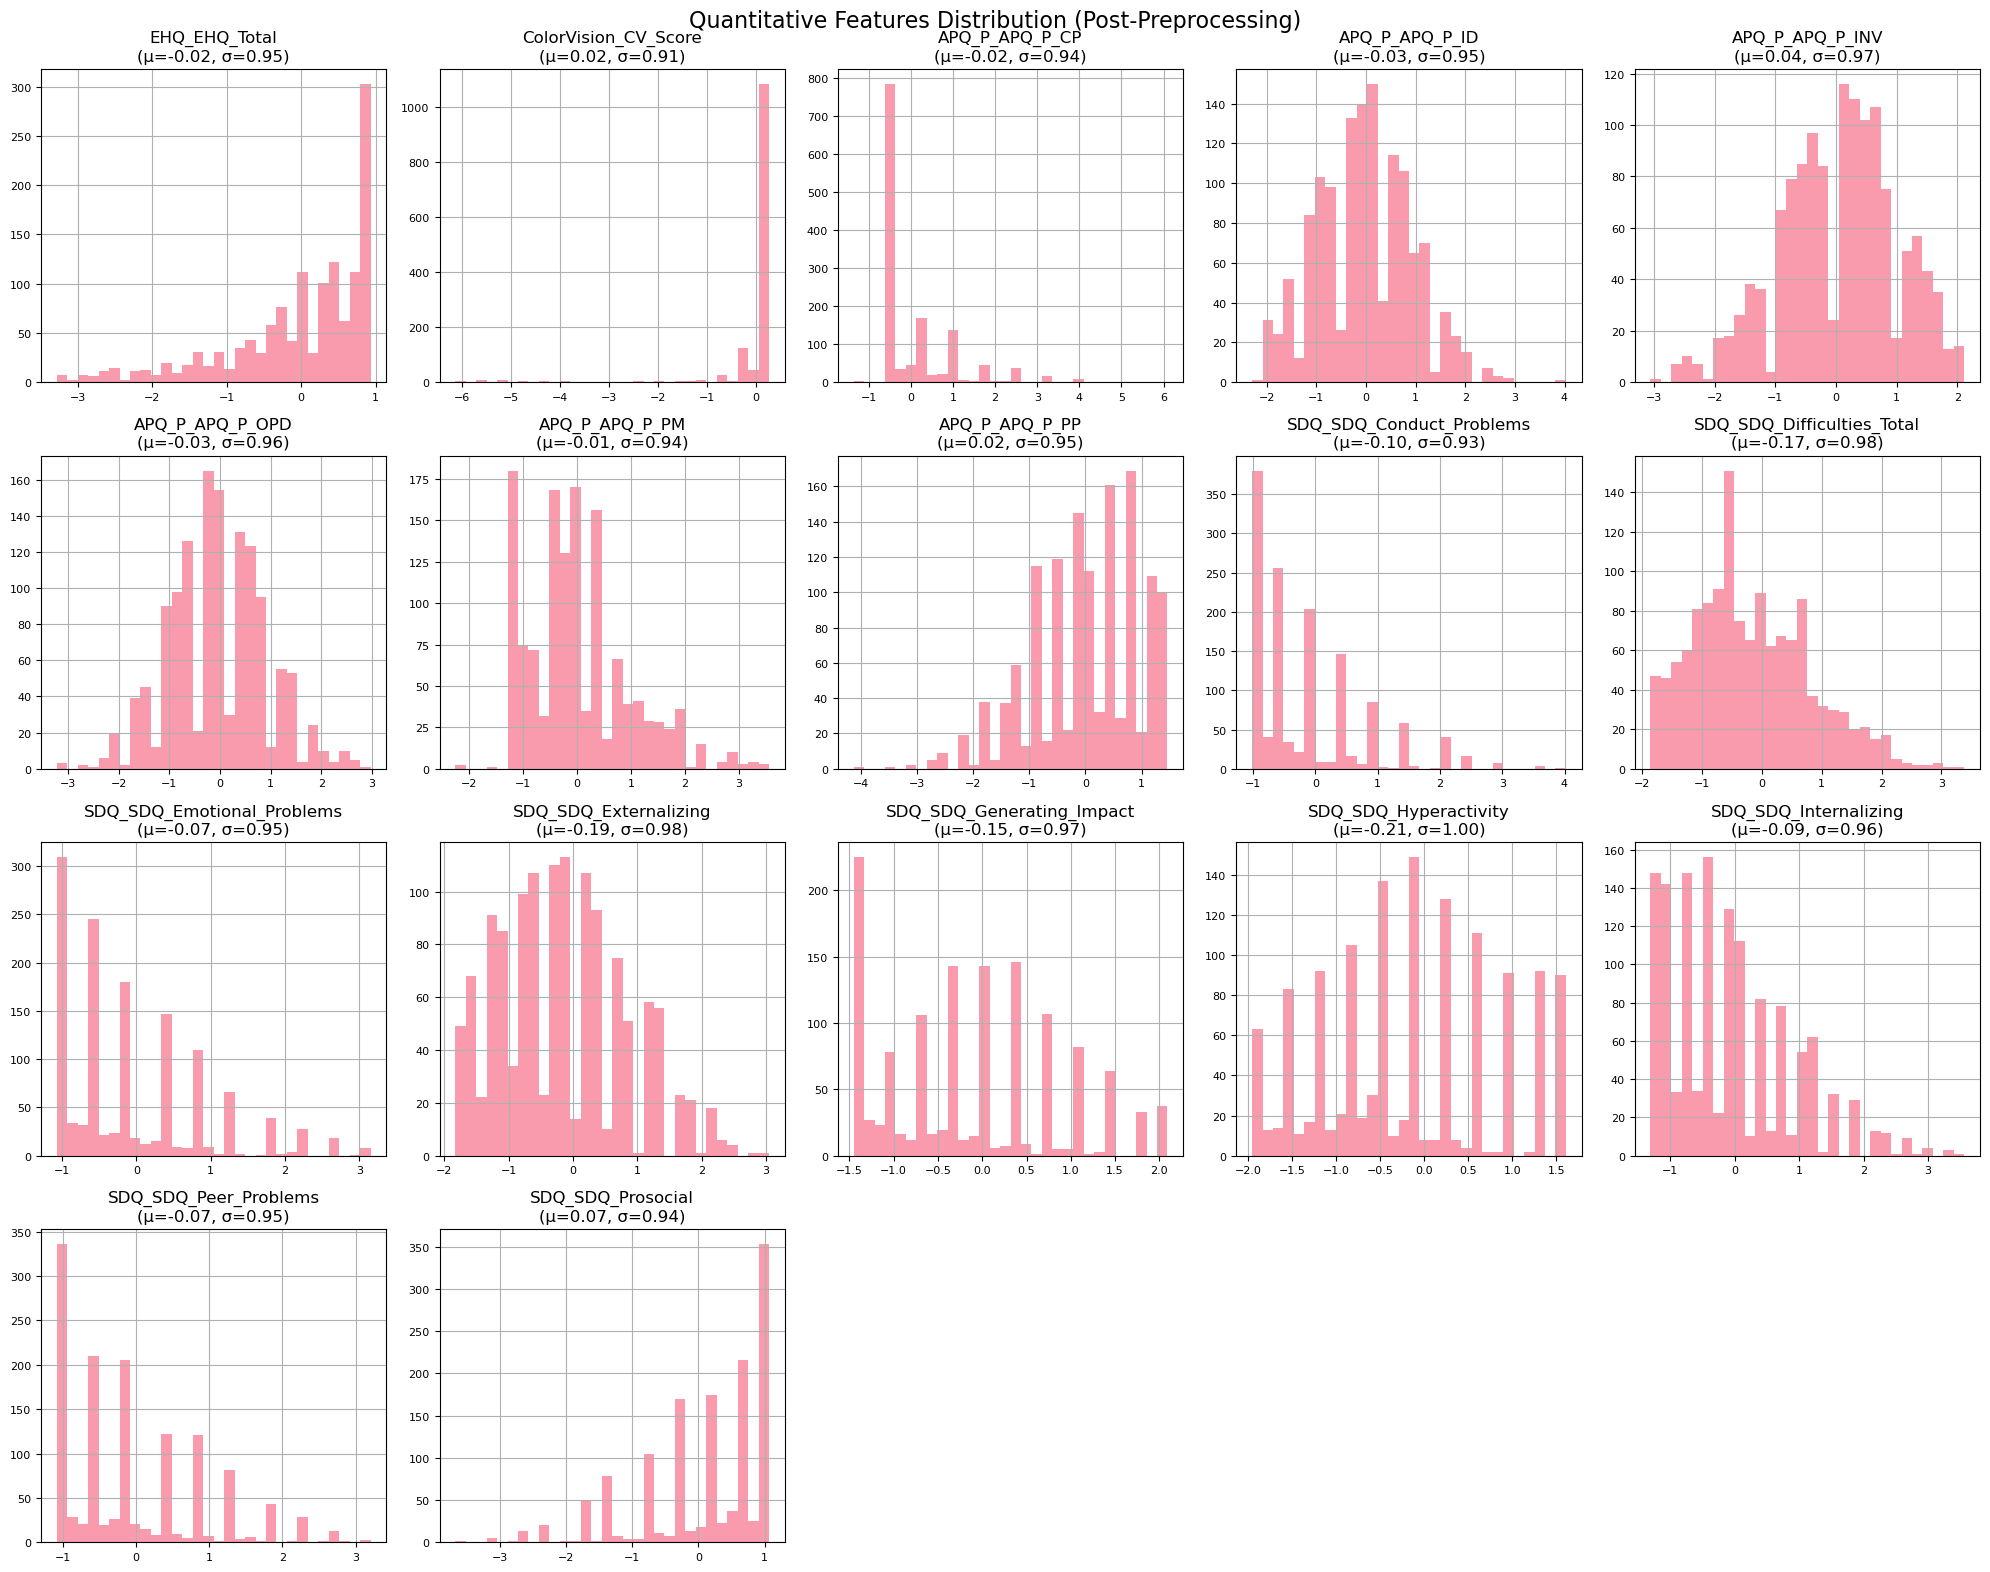

In [3]:
# =============================================================================
# QUANTITATIVE FEATURES ANALYSIS
# =============================================================================

def analyze_quantitative_features(df):
    """
    Analyze distribution and characteristics of quantitative features.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Dataset with quantitative features
    """
    print("📊 STEP 4: Quantitative Features Analysis")
    print("-" * 40)
    
    # Identify quantitative columns (standardized features from preprocessing)
    quant_cols = [col for col in df.columns if any(col.startswith(prefix) for prefix in ['APQ_', 'SDQ_', 'EHQ_', 'ColorVision'])]
    
    
    
    if quant_cols:
        # Statistical summary
        print(f"\n Statistical Summary:")
        summary_stats = df[quant_cols].describe()
        print(summary_stats.round(3))
        
        # Check for standardization (mean ≈ 0, std ≈ 1)
        means = df[quant_cols].mean()
        stds = df[quant_cols].std()
        
        print(f"\n Standardisation Check:")
        print(f"   Mean range: [{means.min():.3f}, {means.max():.3f}]")
        print(f"   Std range: [{stds.min():.3f}, {stds.max():.3f}]")
        
        if abs(means.mean()) < 0.1 and abs(stds.mean() - 1) < 0.1:
            print(f"  Features appear to be standardised")
        else:
            print(f"Features not properly standardised")

        # Distribution visualisation

        n_cols = min(len(quant_cols), 20)  # Limit to first 20 for readability
        
        if n_cols > 0:
            fig, axes = plt.subplots(4, 5, figsize=(20, 16))
            axes = axes.ravel() if n_cols > 1 else [axes]
            
            for i, col in enumerate(quant_cols[:n_cols]):
                if i < len(axes):
                    df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                    axes[i].set_title(f'{col}\n(μ={df[col].mean():.2f}, σ={df[col].std():.2f})')
                    axes[i].tick_params(axis='x', labelsize=8)
                    axes[i].tick_params(axis='y', labelsize=8)
            
            # Hide unused subplots
            for i in range(n_cols, len(axes)):
                axes[i].set_visible(False)
            
            plt.suptitle('Quantitative Features Distribution (Post-Preprocessing)', fontsize=16)
            plt.tight_layout()
            plt.show()

# Analyze quantitative features
analyze_quantitative_features(df)

 Found 10 PCA components from connectome data

 PCA Components Summary:
         conn_1    conn_2    conn_3    conn_4    conn_5    conn_6    conn_7    conn_8    conn_9   conn_10
count  1341.000  1341.000  1341.000  1341.000  1341.000  1341.000  1341.000  1341.000  1341.000  1341.000
mean      0.091    -0.152     0.028    -0.060    -0.006    -0.040     0.024    -0.051     0.014    -0.033
std       6.014     4.346     3.739     3.358     3.312     3.056     2.930     2.962     2.652     2.506
min     -15.100   -11.861   -13.871    -9.550    -9.787    -9.220    -9.631   -12.961    -9.723    -8.967
25%      -4.055    -3.042    -2.288    -2.389    -2.270    -2.109    -1.857    -1.858    -1.744    -1.556
50%      -0.903    -0.369    -0.298    -0.184    -0.204    -0.240     0.084    -0.063    -0.199    -0.208
75%       2.915     2.226     2.082     2.126     2.051     1.760     1.905     1.746     1.749     1.372
max      25.986    20.984    16.491    14.771    13.202    13.264    13.853    1

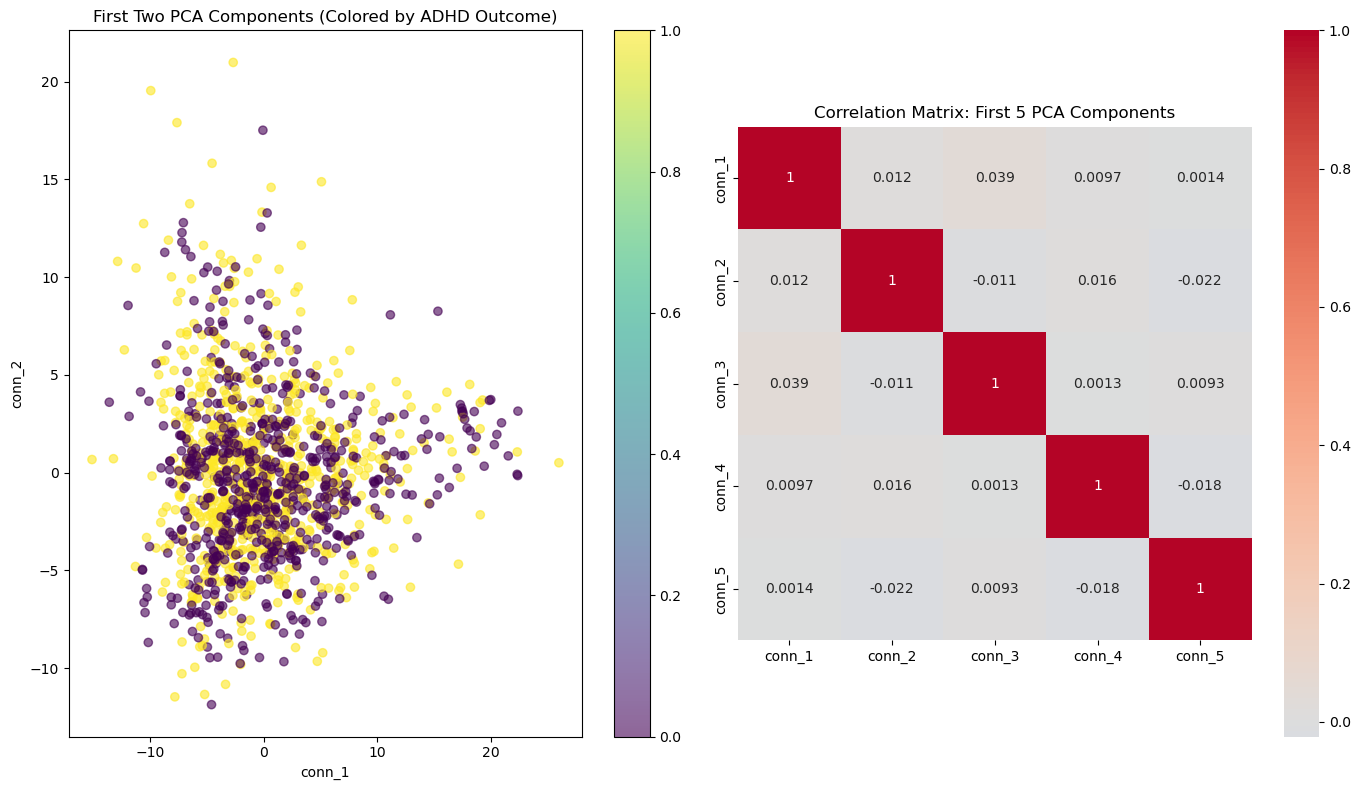


 PCA Component Statistics:
 conn_1: Variance = 36.1628
 conn_2: Variance = 18.8841
 conn_3: Variance = 13.9821
 conn_4: Variance = 11.2764
 conn_5: Variance = 10.9713
 conn_6: Variance = 9.3381
 conn_7: Variance = 8.5825
 conn_8: Variance = 8.7748
 conn_9: Variance = 7.0329
 conn_10: Variance = 6.2820


In [4]:
# =============================================================================
# CONNECTOME PCA COMPONENTS ANALYSIS
# =============================================================================

def analyze_connectome_pca(df):
    """
    Analyze PCA components from connectome data.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Dataset with PCA components
    """
   
    
    # Identify PCA components
    pca_cols = [col for col in df.columns if col.startswith('conn_')]

    if not pca_cols:
        print("   No PCA components found with 'conn_' prefix")
        return
    
    print(f" Found {len(pca_cols)} PCA components from connectome data")
    
    # Statistical summary of PCA components
    print(f"\n PCA Components Summary:")
    pca_summary = df[pca_cols].describe()
    print(pca_summary.round(3))
    
    # Visualization of first few components
    if len(pca_cols) >= 2:
    
        fig, axes = plt.subplots(1, 2, figsize=(14, 8))
        
        # Scatter plot of first two components
        scatter = axes[0].scatter(df[pca_cols[0]], df[pca_cols[1]],
                                   c=df['ADHD_Outcome'], alpha=0.6, cmap='viridis')
        axes[0].set_xlabel(f'{pca_cols[0]}')
        axes[0].set_ylabel(f'{pca_cols[1]}')
        axes[0].set_title('First Two PCA Components (Colored by ADHD Outcome)')
        plt.colorbar(scatter, ax=axes[0])



        
        # Correlation matrix of first 5 components
        n_components = min(5, len(pca_cols))
        corr_matrix = df[pca_cols[:n_components]].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   ax=axes[1], square=True)
        axes[1].set_title(f'Correlation Matrix: First {n_components} PCA Components')

        plt.tight_layout()
        plt.show()
    
    # Component importance (variance analysis if available)
    print(f"\n PCA Component Statistics:")
    for i, col in enumerate(pca_cols[:11]):  # Show first 5
        variance = df[col].var()
        print(f" {col}: Variance = {variance:.4f}")

# Analyze connectome PCA components  
analyze_connectome_pca(df)

141 encoded categorical features

 Categorical Variable Groups:
Basic: 10 categories
PreInt: 33 categories
Barratt: 96 categories
Sex: 2 categories

 Categorical Features vs ADHD Outcome:


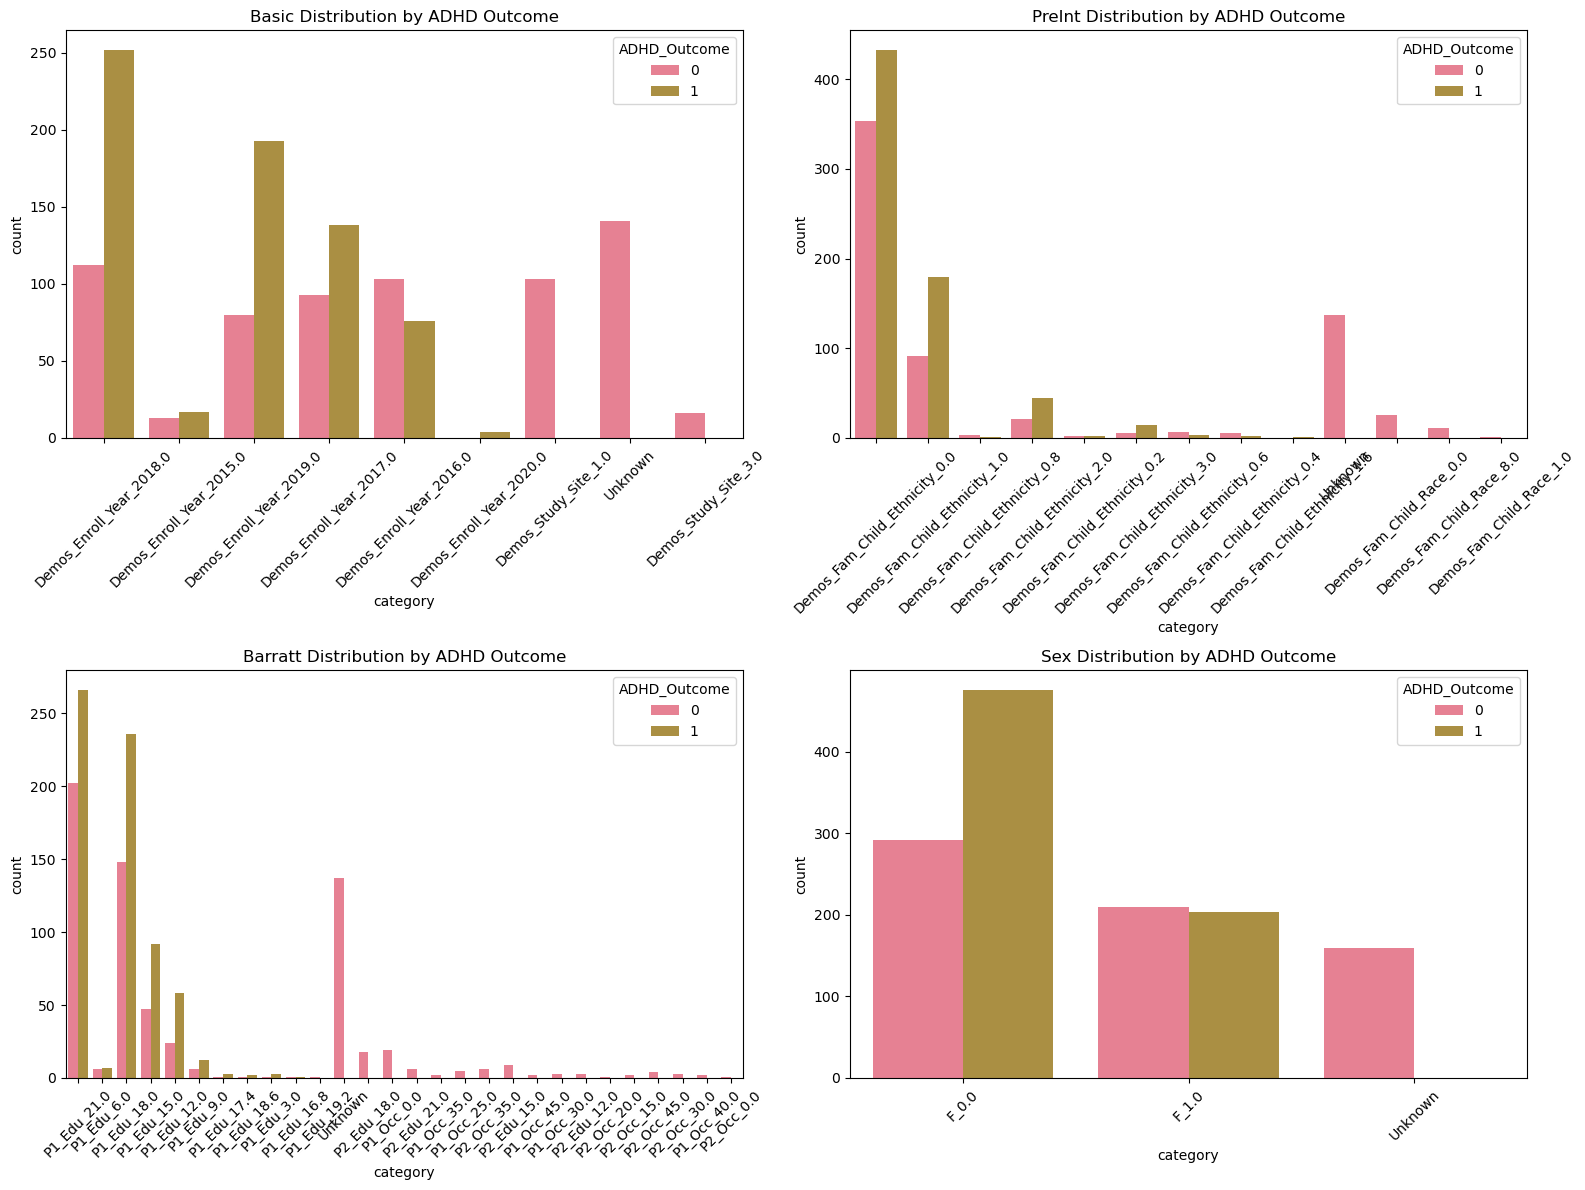

In [5]:
# =============================================================================
# CATEGORICAL FEATURES ANALYSIS
# =============================================================================

def analyze_categorical_features(df):
    """
    Analyze encoded categorical features and their relationships with target.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Dataset with encoded categorical features
    """

    
    # Identify encoded categorical columns
    cat_encoded_cols = [col for col in df.columns if any(col.startswith(prefix) 
                       for prefix in ['PreInt_', 'Basic_', 'Sex_', 'Barratt_',])]
    
  
    
    print(f"{len(cat_encoded_cols)} encoded categorical features")
    
    # Group by original categorical variable
    categorical_groups = {}
    for col in cat_encoded_cols:
        prefix = col.split('_')[0] + '_'
        if prefix not in categorical_groups:
            categorical_groups[prefix] = []
        categorical_groups[prefix].append(col)
    
    print(f"\n Categorical Variable Groups:")
    for group, cols in categorical_groups.items():
        print(f"{group[:-1]}: {len(cols)} categories")
    
    # Analyze relationship with target variable
    if 'ADHD_Outcome' in df.columns:
        print(f"\n Categorical Features vs ADHD Outcome:")
        
        # Focus on key categorical variables
        key_groups = list(categorical_groups.keys())[:4]  # Analyze first 4 groups
        
        if key_groups:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.ravel()
            
            for i, group in enumerate(key_groups):
                if i < len(axes):
                    # Create a summary variable for this group (most common category)
                    group_cols = categorical_groups[group]
                    
                    # Find the active category for each sample
                    group_data = df[group_cols].copy()
                    active_categories = []
                    
                    for idx in range(len(df)):
                        active_cols = group_data.iloc[idx][group_data.iloc[idx] == 1].index.tolist()
                        if active_cols:
                            active_categories.append(active_cols[0].replace(group, ''))
                        else:
                            active_categories.append('Unknown')
                    
                    # Create temporary dataframe for plotting
                    temp_df = pd.DataFrame({
                        'category': active_categories,
                        'ADHD_Outcome': df['ADHD_Outcome']
                    })
                    
                    # Count plot
                    sns.countplot(data=temp_df, x='category', hue='ADHD_Outcome', ax=axes[i])
                    axes[i].set_title(f'{group[:-1]} Distribution by ADHD Outcome')
                    axes[i].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
    
  
# Analyze categorical features
analyze_categorical_features(df)